# Importing Essential Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from scipy.stats import chi2_contingency
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
import xgboost as xgb
from xgboost import XGBClassifier

In [6]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
columns = ["Status", "Duration", "CreditHistory", "Purpose", "CreditAmount", "Savings",
           "EmploymentSince", "InstallmentRate", "PersonalStatusSex", "OtherDebtors",
           "ResidenceSince", "Property", "Age", "OtherInstallmentPlans", "Housing",
           "ExistingCredits", "Job", "NumPeopleLiable", "Telephone", "ForeignWorker", "Target"]

df = pd.read_csv(url, delim_whitespace=True, names=columns)

# Exploratory Data Analysis and Feature Engineering

In [7]:
df.head()

,Status,Duration,CreditHistory,Purpose,CreditAmount,Savings,EmploymentSince,InstallmentRate,PersonalStatusSex,OtherDebtors,...,Property,Age,OtherInstallmentPlans,Housing,ExistingCredits,Job,NumPeopleLiable,Telephone,ForeignWorker,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [8]:
df.columns

Index(['Status', 'Duration', 'CreditHistory', 'Purpose', 'CreditAmount',
       'Savings', 'EmploymentSince', 'InstallmentRate', 'PersonalStatusSex',
       'OtherDebtors', 'ResidenceSince', 'Property', 'Age',
       'OtherInstallmentPlans', 'Housing', 'ExistingCredits', 'Job',
       'NumPeopleLiable', 'Telephone', 'ForeignWorker', 'Target'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Status                 1000 non-null   object
 1   Duration               1000 non-null   int64 
 2   CreditHistory          1000 non-null   object
 3   Purpose                1000 non-null   object
 4   CreditAmount           1000 non-null   int64 
 5   Savings                1000 non-null   object
 6   EmploymentSince        1000 non-null   object
 7   InstallmentRate        1000 non-null   int64 
 8   PersonalStatusSex      1000 non-null   object
 9   OtherDebtors           1000 non-null   object
 10  ResidenceSince         1000 non-null   int64 
 11  Property               1000 non-null   object
 12  Age                    1000 non-null   int64 
 13  OtherInstallmentPlans  1000 non-null   object
 14  Housing                1000 non-null   object
 15  ExistingCredits       

In [10]:
df.describe()

,Duration,CreditAmount,InstallmentRate,ResidenceSince,Age,ExistingCredits,NumPeopleLiable,Target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [11]:
df['Target'].value_counts(normalize = True)

Target
1    0.7
2    0.3
Name: proportion, dtype: float64

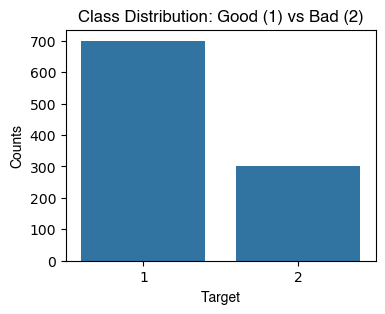

In [12]:
# Target class distribution
hfont = {'fontname':'Helvetica'}
plt.figure(figsize = (4,3))
sns.countplot(x='Target', data=df)
plt.title("Class Distribution: Good (1) vs Bad (2)", **hfont)
plt.ylabel('Counts', **hfont)
plt.xlabel('Target', **hfont)
plt.show()

In [14]:
# Map target to binary
df['Target'] = df['Target'].map({1: 1, 2: 0})  # 1: Good, 2: Bad

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Status                 1000 non-null   object
 1   Duration               1000 non-null   int64 
 2   CreditHistory          1000 non-null   object
 3   Purpose                1000 non-null   object
 4   CreditAmount           1000 non-null   int64 
 5   Savings                1000 non-null   object
 6   EmploymentSince        1000 non-null   object
 7   InstallmentRate        1000 non-null   int64 
 8   PersonalStatusSex      1000 non-null   object
 9   OtherDebtors           1000 non-null   object
 10  ResidenceSince         1000 non-null   int64 
 11  Property               1000 non-null   object
 12  Age                    1000 non-null   int64 
 13  OtherInstallmentPlans  1000 non-null   object
 14  Housing                1000 non-null   object
 15  ExistingCredits       

In [16]:
# Step 3: Preprocessing
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(cat_cols)

['Status', 'CreditHistory', 'Purpose', 'Savings', 'EmploymentSince', 'PersonalStatusSex', 'OtherDebtors', 'Property', 'OtherInstallmentPlans', 'Housing', 'Job', 'Telephone', 'ForeignWorker']


In [17]:
# Identify numeric features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('Target')

# Correlation matrix
correlations = df[numeric_features + ['Target']].corr()

# Correlation with Target
corr_target = correlations['Target'].sort_values(ascending=False)
print(corr_target)

Target             1.000000
Age                0.091127
ExistingCredits    0.045732
NumPeopleLiable    0.003015
ResidenceSince    -0.002967
InstallmentRate   -0.072404
CreditAmount      -0.154739
Duration          -0.214927
Name: Target, dtype: float64


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'Duration'),
  Text(0, 1.5, 'CreditAmount'),
  Text(0, 2.5, 'InstallmentRate'),
  Text(0, 3.5, 'ResidenceSince'),
  Text(0, 4.5, 'Age'),
  Text(0, 5.5, 'ExistingCredits'),
  Text(0, 6.5, 'NumPeopleLiable'),
  Text(0, 7.5, 'Target')])

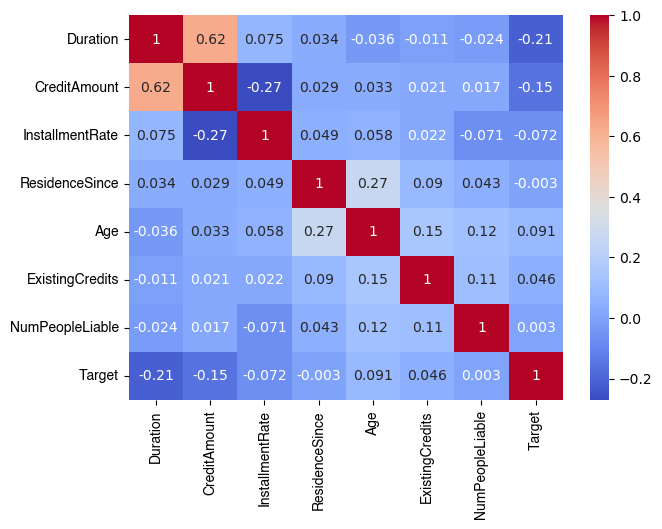

In [18]:
plt.figure(figsize=(7,5))
sns.heatmap(correlations, cmap='coolwarm', annot = True)
plt.xticks(**hfont)
plt.yticks(**hfont)

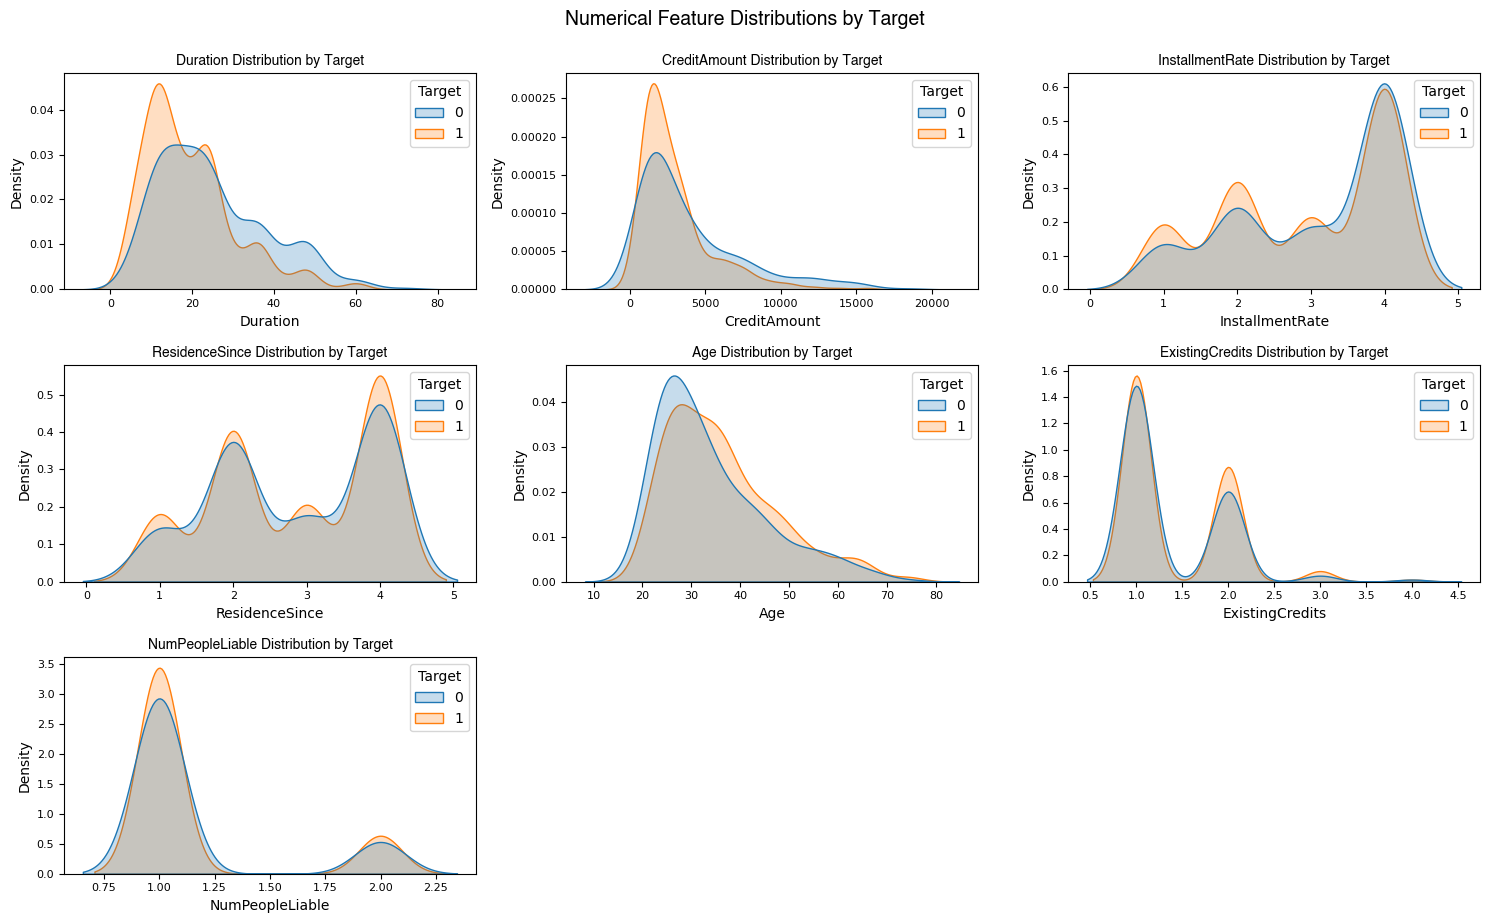

In [31]:
# List of numerical features excluding the target
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Target' in numeric_features:
    numeric_features.remove('Target')

# Subplot layout
n_cols = 3
n_rows = (len(numeric_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()

# Create KDE plots in subplots
for i, col in enumerate(numeric_features):
    sns.kdeplot(data=df, x=col, hue='Target', fill=True, ax=axes[i], common_norm=False)
    axes[i].set_title(f'{col} Distribution by Target', fontsize=10, **hfont)
    axes[i].tick_params(axis='both', labelsize=8)

# Remove any unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
fig.suptitle('Numerical Feature Distributions by Target', fontsize=14, y=1.02, **hfont)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

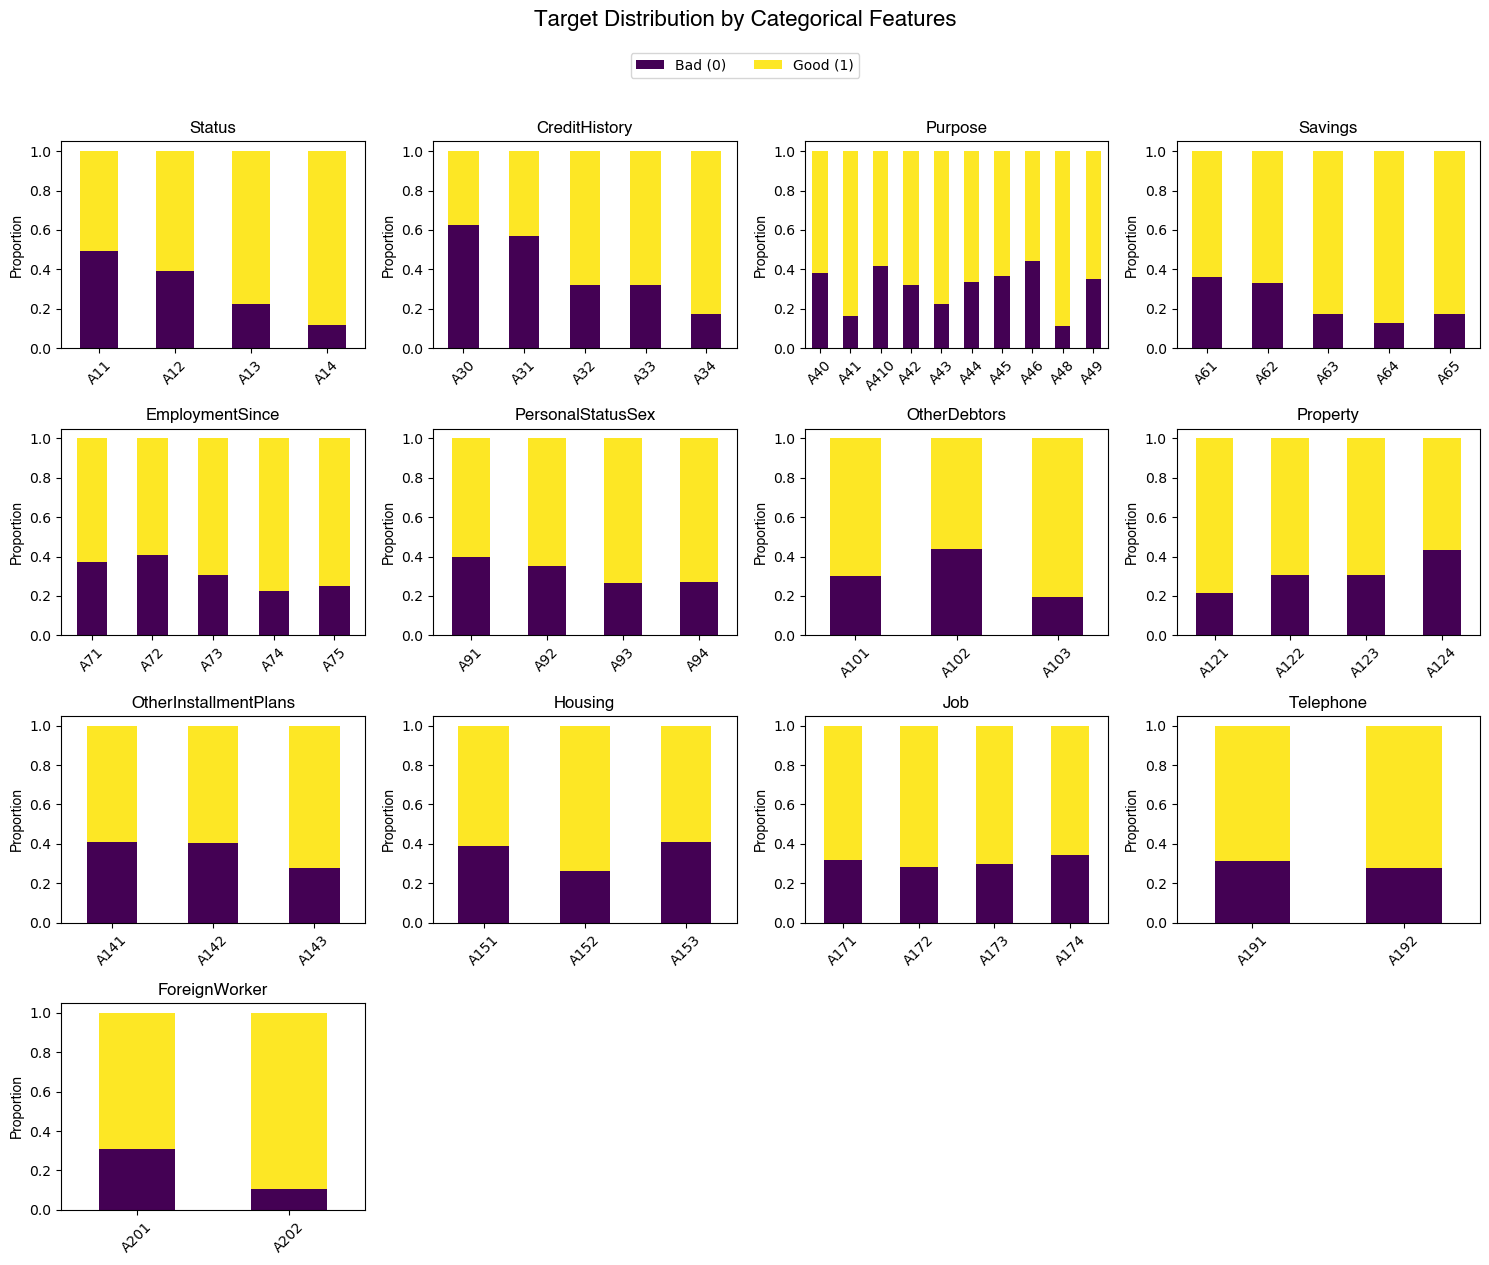

In [33]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Set up the subplot grid (adjust columns based on how many features you want per row)
n_cols = 4
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()  # Flatten to iterate easily

for i, col in enumerate(categorical_cols):
    ct = pd.crosstab(df[col], df['Target'], normalize='index')
    ct.plot(kind='bar', stacked=True, colormap='viridis', ax=axes[i], legend=False)
    axes[i].set_title(f'{col}', **hfont)
    axes[i].set_ylabel('Proportion', **hfont)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add one shared legend outside the grid
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ['Bad (0)', 'Good (1)'], loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.02))

fig.suptitle('Target Distribution by Categorical Features', fontsize=16, y =1.05, **hfont)
plt.tight_layout()
plt.show()

In [35]:
print("Chi-Square Test Results:")
cat_cols = []
for col in categorical_cols:
    table = pd.crosstab(df[col], df['Target'])
    chi2, p, dof, ex = chi2_contingency(table)
    if(p < 0.05):
        cat_cols.append(col)        
    print(f"{col}: p-value = {p:.4f} {'(Significant)' if p < 0.05 else '(Not Significant)'}")

Chi-Square Test Results:
Status: p-value = 0.0000 (Significant)
CreditHistory: p-value = 0.0000 (Significant)
Purpose: p-value = 0.0001 (Significant)
Savings: p-value = 0.0000 (Significant)
EmploymentSince: p-value = 0.0010 (Significant)
PersonalStatusSex: p-value = 0.0222 (Significant)
OtherDebtors: p-value = 0.0361 (Significant)
Property: p-value = 0.0000 (Significant)
OtherInstallmentPlans: p-value = 0.0016 (Significant)
Housing: p-value = 0.0001 (Significant)
Job: p-value = 0.5966 (Not Significant)
Telephone: p-value = 0.2789 (Not Significant)
ForeignWorker: p-value = 0.0158 (Significant)


In [37]:
cat_cols

['Status',
 'CreditHistory',
 'Purpose',
 'Savings',
 'EmploymentSince',
 'PersonalStatusSex',
 'OtherDebtors',
 'Property',
 'OtherInstallmentPlans',
 'Housing',
 'ForeignWorker']

In [39]:
df_encoded = pd.get_dummies(df, columns = cat_cols, drop_first = True)

In [41]:
df_encoded.head()

,Duration,CreditAmount,InstallmentRate,ResidenceSince,Age,ExistingCredits,Job,NumPeopleLiable,Telephone,Target,...,OtherDebtors_A102,OtherDebtors_A103,Property_A122,Property_A123,Property_A124,OtherInstallmentPlans_A142,OtherInstallmentPlans_A143,Housing_A152,Housing_A153,ForeignWorker_A202
0,6,1169,4,4,67,2,A173,1,A192,1,...,False,False,False,False,False,False,True,True,False,False
1,48,5951,2,2,22,1,A173,1,A191,0,...,False,False,False,False,False,False,True,True,False,False
2,12,2096,2,3,49,1,A172,2,A191,1,...,False,False,False,False,False,False,True,True,False,False
3,42,7882,2,4,45,1,A173,2,A191,1,...,False,True,True,False,False,False,True,False,True,False
4,24,4870,3,4,53,2,A173,2,A191,0,...,False,False,False,False,True,False,True,False,True,False


In [43]:
df_encoded.columns

Index(['Duration', 'CreditAmount', 'InstallmentRate', 'ResidenceSince', 'Age',
       'ExistingCredits', 'Job', 'NumPeopleLiable', 'Telephone', 'Target',
       'Status_A12', 'Status_A13', 'Status_A14', 'CreditHistory_A31',
       'CreditHistory_A32', 'CreditHistory_A33', 'CreditHistory_A34',
       'Purpose_A41', 'Purpose_A410', 'Purpose_A42', 'Purpose_A43',
       'Purpose_A44', 'Purpose_A45', 'Purpose_A46', 'Purpose_A48',
       'Purpose_A49', 'Savings_A62', 'Savings_A63', 'Savings_A64',
       'Savings_A65', 'EmploymentSince_A72', 'EmploymentSince_A73',
       'EmploymentSince_A74', 'EmploymentSince_A75', 'PersonalStatusSex_A92',
       'PersonalStatusSex_A93', 'PersonalStatusSex_A94', 'OtherDebtors_A102',
       'OtherDebtors_A103', 'Property_A122', 'Property_A123', 'Property_A124',
       'OtherInstallmentPlans_A142', 'OtherInstallmentPlans_A143',
       'Housing_A152', 'Housing_A153', 'ForeignWorker_A202'],
      dtype='object')

In [45]:
# Scale numeric features
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.difference(['Target'])
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [47]:
df_encoded.columns

Index(['Duration', 'CreditAmount', 'InstallmentRate', 'ResidenceSince', 'Age',
       'ExistingCredits', 'Job', 'NumPeopleLiable', 'Telephone', 'Target',
       'Status_A12', 'Status_A13', 'Status_A14', 'CreditHistory_A31',
       'CreditHistory_A32', 'CreditHistory_A33', 'CreditHistory_A34',
       'Purpose_A41', 'Purpose_A410', 'Purpose_A42', 'Purpose_A43',
       'Purpose_A44', 'Purpose_A45', 'Purpose_A46', 'Purpose_A48',
       'Purpose_A49', 'Savings_A62', 'Savings_A63', 'Savings_A64',
       'Savings_A65', 'EmploymentSince_A72', 'EmploymentSince_A73',
       'EmploymentSince_A74', 'EmploymentSince_A75', 'PersonalStatusSex_A92',
       'PersonalStatusSex_A93', 'PersonalStatusSex_A94', 'OtherDebtors_A102',
       'OtherDebtors_A103', 'Property_A122', 'Property_A123', 'Property_A124',
       'OtherInstallmentPlans_A142', 'OtherInstallmentPlans_A143',
       'Housing_A152', 'Housing_A153', 'ForeignWorker_A202'],
      dtype='object')

In [49]:
print(df_encoded.columns)

Index(['Duration', 'CreditAmount', 'InstallmentRate', 'ResidenceSince', 'Age',
       'ExistingCredits', 'Job', 'NumPeopleLiable', 'Telephone', 'Target',
       'Status_A12', 'Status_A13', 'Status_A14', 'CreditHistory_A31',
       'CreditHistory_A32', 'CreditHistory_A33', 'CreditHistory_A34',
       'Purpose_A41', 'Purpose_A410', 'Purpose_A42', 'Purpose_A43',
       'Purpose_A44', 'Purpose_A45', 'Purpose_A46', 'Purpose_A48',
       'Purpose_A49', 'Savings_A62', 'Savings_A63', 'Savings_A64',
       'Savings_A65', 'EmploymentSince_A72', 'EmploymentSince_A73',
       'EmploymentSince_A74', 'EmploymentSince_A75', 'PersonalStatusSex_A92',
       'PersonalStatusSex_A93', 'PersonalStatusSex_A94', 'OtherDebtors_A102',
       'OtherDebtors_A103', 'Property_A122', 'Property_A123', 'Property_A124',
       'OtherInstallmentPlans_A142', 'OtherInstallmentPlans_A143',
       'Housing_A152', 'Housing_A153', 'ForeignWorker_A202'],
      dtype='object')


In [51]:
df_encoded.drop(['Telephone', 'Job'], axis = 1, inplace = True)

In [53]:
# Step 4: Train-test split
X = df_encoded.drop('Target', axis=1)
y = df_encoded['Target']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

# XG Boost Classifier

In [68]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    }

clf = RandomizedSearchCV(XGBClassifier(eval_metric = 'logloss'), 
                         param_distributions = params, 
                         scoring = 'roc_auc', 
                         cv = 5, n_iter = 100, random_state = 42, n_jobs = -1, verbose = 1)

clf.fit(X_train, y_train)
best_model = clf.best_estimator_

# Get the best model and its performance
print(f"Best Parameters: {clf.best_params_}")
print(f"Best ROC AUC Score on CV: {clf.best_score_:.4f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 5, 'colsample_bytree': 1.0}
Best ROC AUC Score on CV: 0.7940


In [70]:
# Step 6: Evaluation
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score
import numpy as np

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize classifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Stratified CV for imbalanced data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,  # number of parameter settings to try
    scoring='roc_auc',
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the search
random_search.fit(X_train, y_train)

# Get the best model and its performance
best_rf = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best ROC AUC Score on CV: {random_search.best_score_:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}
Best ROC AUC Score on CV: 0.7903


In [63]:
# Step 6: Evaluation
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

# Model Evaluation

In [66]:
# Evaluation
def evaluate_model(name, y_true, y_pred, y_proba):
    print(f"\n {name} Results")
    print("Accuracy:", (y_true == y_pred).mean())
    print("ROC AUC Score:", roc_auc_score(y_true, y_proba))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

In [35]:
evaluate_model("Random Forest", y_test, y_pred_rf, y_proba_rf)
evaluate_model("\n\nXGBoost", y_test, y_pred, y_proba)


 Random Forest Results
Accuracy: 0.685
ROC AUC Score: 0.7663095238095238
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.53      0.50        60
           1       0.79      0.75      0.77       140

    accuracy                           0.69       200
   macro avg       0.63      0.64      0.64       200
weighted avg       0.70      0.69      0.69       200

Confusion Matrix:
 [[ 32  28]
 [ 35 105]]

 

XGBoost Results
Accuracy: 0.73
ROC AUC Score: 0.7614285714285715
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.43      0.49        60
           1       0.78      0.86      0.82       140

    accuracy                           0.73       200
   macro avg       0.67      0.65      0.65       200
weighted avg       0.72      0.73      0.72       200

Confusion Matrix:
 [[ 26  34]
 [ 20 120]]


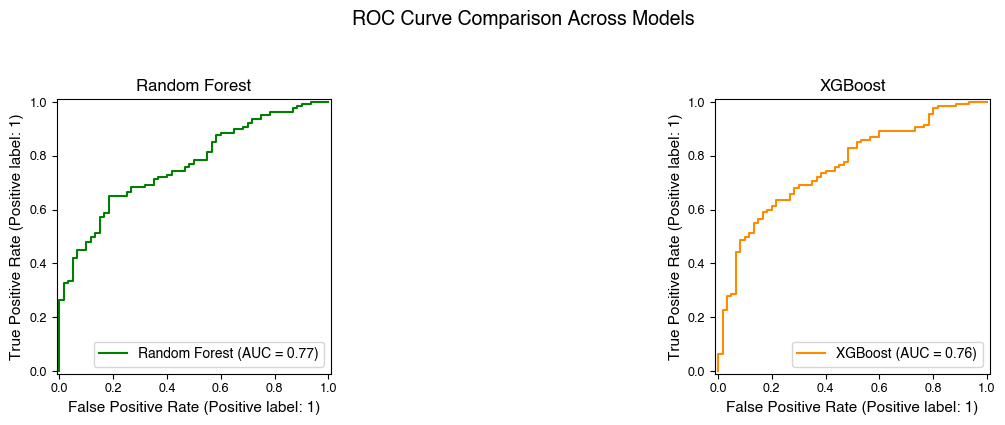

In [58]:
# Set up 1 row x 3 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Random Forest
RocCurveDisplay.from_estimator(
    best_rf, X_test, y_test, ax=axes[0], name='Random Forest', color='green'
)
axes[0].set_title('Random Forest')

# XGBoost
RocCurveDisplay.from_estimator(
    best_model, X_test, y_test, ax=axes[1], name='XGBoost', color='darkorange'
)
axes[1].set_title('XGBoost')

# Global layout
fig.suptitle('ROC Curve Comparison Across Models', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

# SHAP for Random Forest Classifier

In [104]:
rf_explainer = shap.TreeExplainer(best_rf)

In [114]:
shap_values_rf = rf_explainer(X_test)

In [126]:
shap_values_rf.shape

(200, 44, 2)

In [116]:
# For class 1 (non-defaulters, the usual positive class)
shap_values_class1 = shap_values_rf[:, :, 1]
shap_values_class0 = shap_values_rf[:, :, 0]

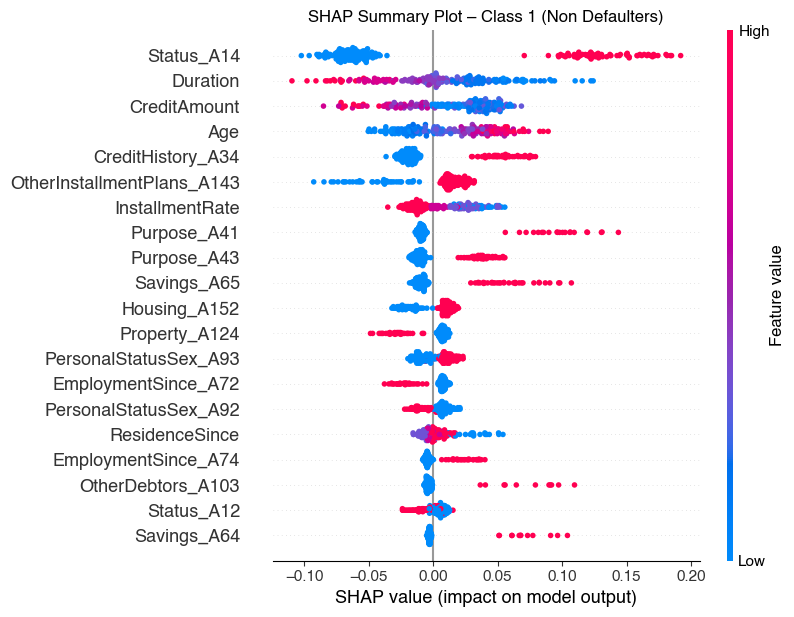

In [185]:
# Set Helvetica font (fallback if not found is sans-serif)
plt.rcParams.update({
    'font.family': 'Helvetica',        # use Helvetica
    'font.size': 9,
    'axes.titlesize': 2,
    'axes.labelsize': 8,
    'xtick.labelsize': 7,
    'ytick.labelsize': 7,
    'legend.fontsize': 8,
    })

# SHAP summary plot
shap.summary_plot(
    shap_values_class1,
    X_test,
    plot_size=(8, 6),
    show=False
)
# Set the title manually
plt.title("SHAP Summary Plot – Class 1 (Non Defaulters)", fontsize=12)
plt.tight_layout()
plt.show()

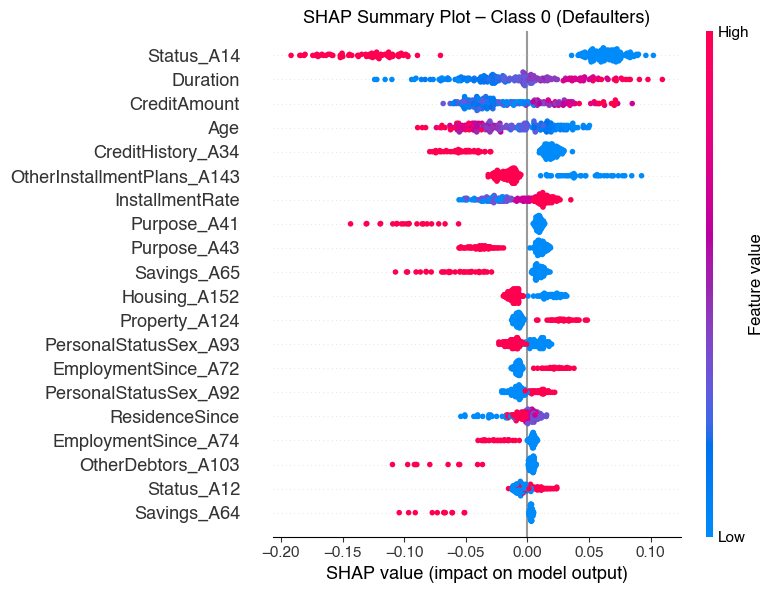

In [187]:
# Set Helvetica font (fallback if not found is sans-serif)
plt.rcParams.update({
    'font.family': 'Helvetica',        # use Helvetica
    'font.size': 9,
    'axes.titlesize': 2,
    'axes.labelsize': 4,
    'xtick.labelsize': 4,
    'ytick.labelsize': 4,
    'legend.fontsize': 4,
    })

# SHAP summary plot
shap.summary_plot(
    shap_values_class0,
    X_test,
    plot_size=(8, 6),
    show=False
)
# Set the title manually
plt.title("SHAP Summary Plot – Class 0 (Defaulters)", fontsize=13)
plt.tight_layout()
plt.show()

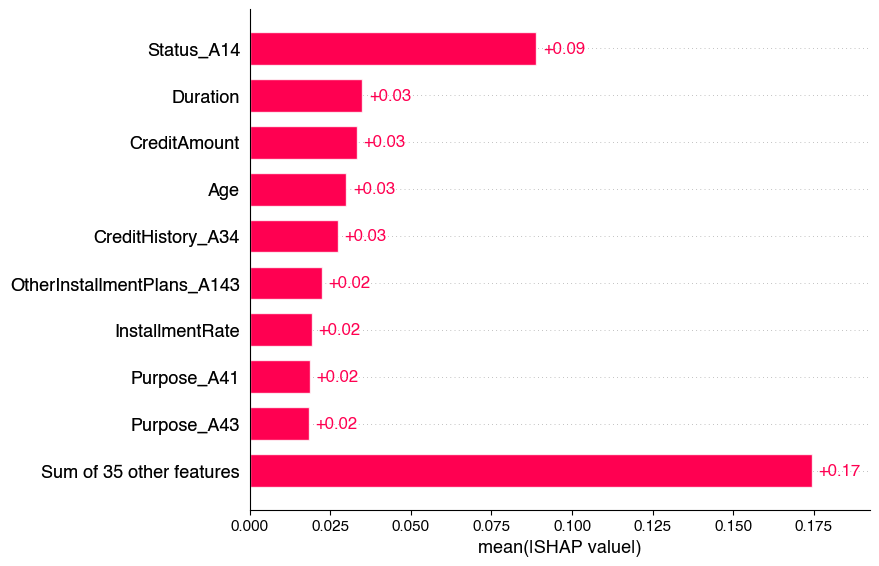

In [191]:
shap.plots.bar(shap_values_class0)

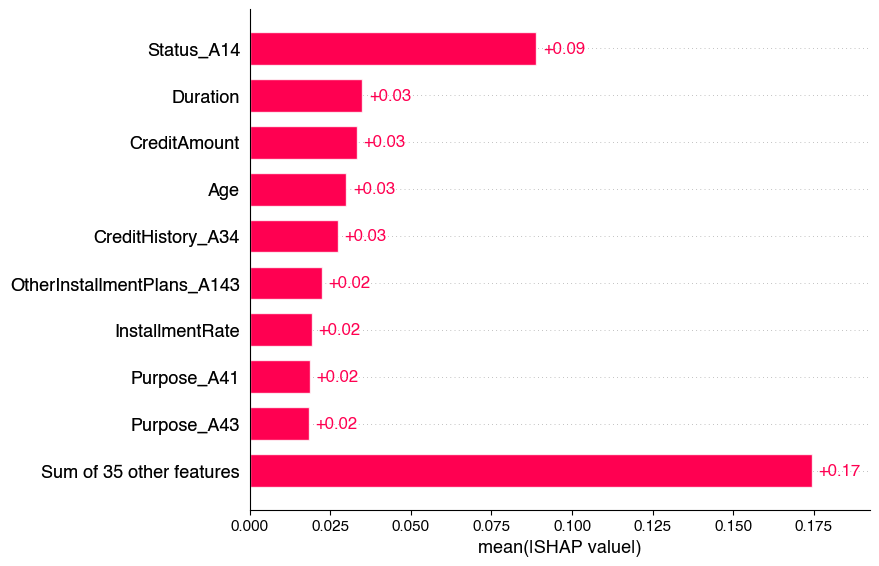

In [193]:
shap.plots.bar(shap_values_class1)

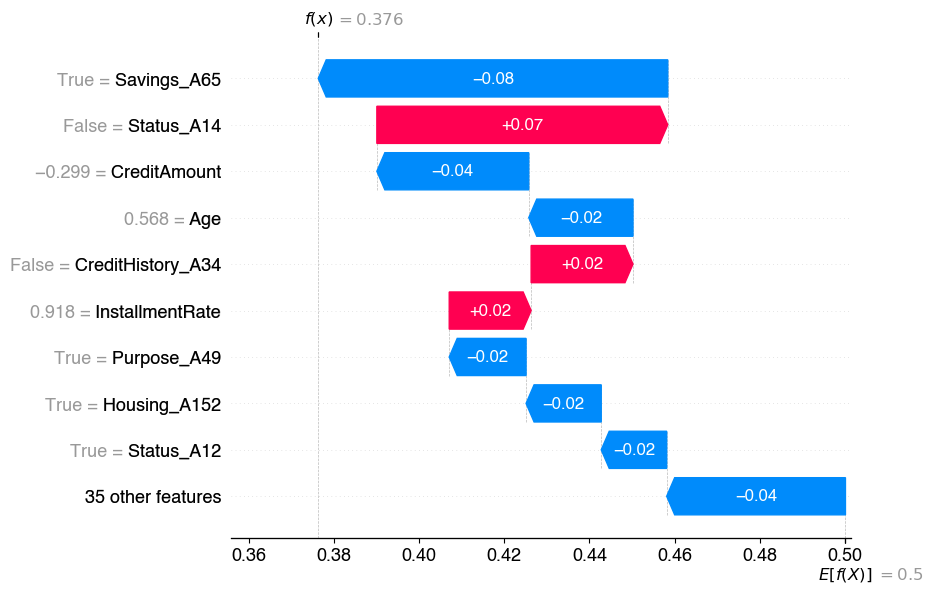

In [124]:
shap.plots.waterfall(shap_values_class0[0])

# SHAP for XGBoost 

In [139]:
# Step 7: SHAP interpretation
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)

In [141]:
np.shape(shap_values.values)

(200, 44)

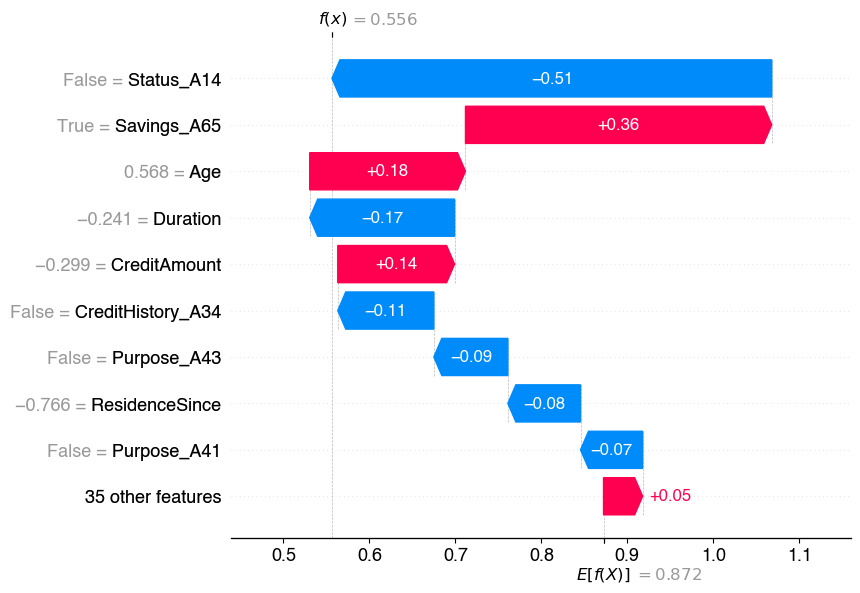

In [143]:
shap.plots.waterfall(shap_values[0])

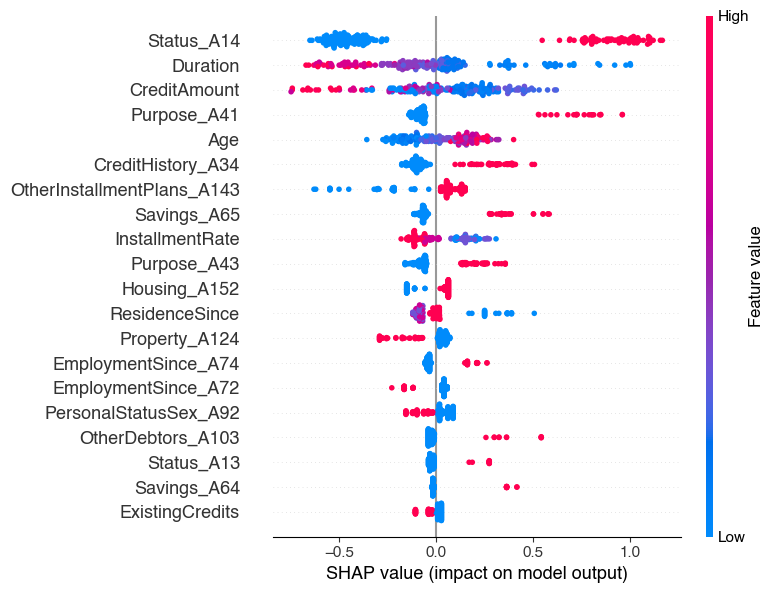

In [144]:
# Set Helvetica font (fallback if not found is sans-serif)
plt.rcParams.update({
    'font.family': 'Helvetica',        # use Helvetica
    'font.size': 9,
    'axes.titlesize': 2,
    'axes.labelsize': 8,
    'xtick.labelsize': 7,
    'ytick.labelsize': 7,
    'legend.fontsize': 8,
    })

# SHAP summary plot
shap.summary_plot(
    shap_values,
    X_test,
    plot_size=(8, 6),
    show=True
)

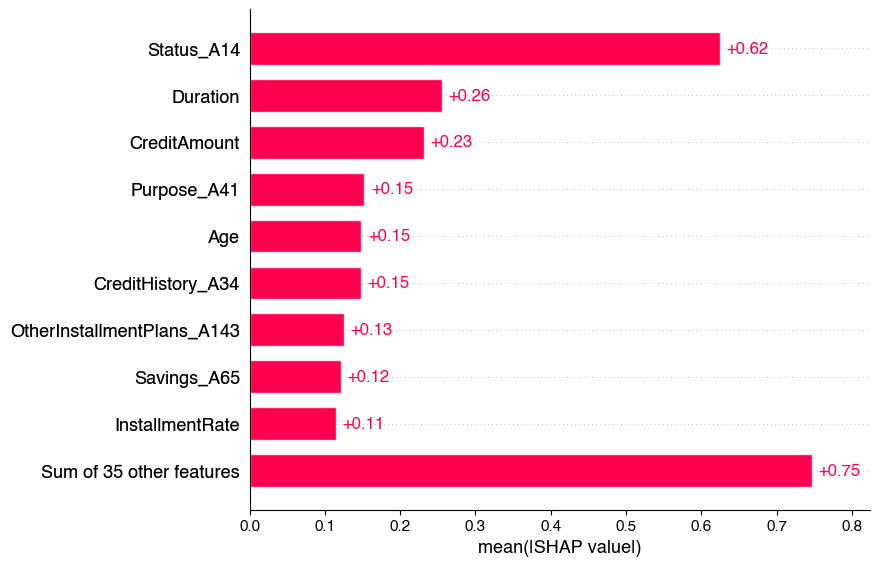

In [145]:
shap.plots.bar(shap_values)

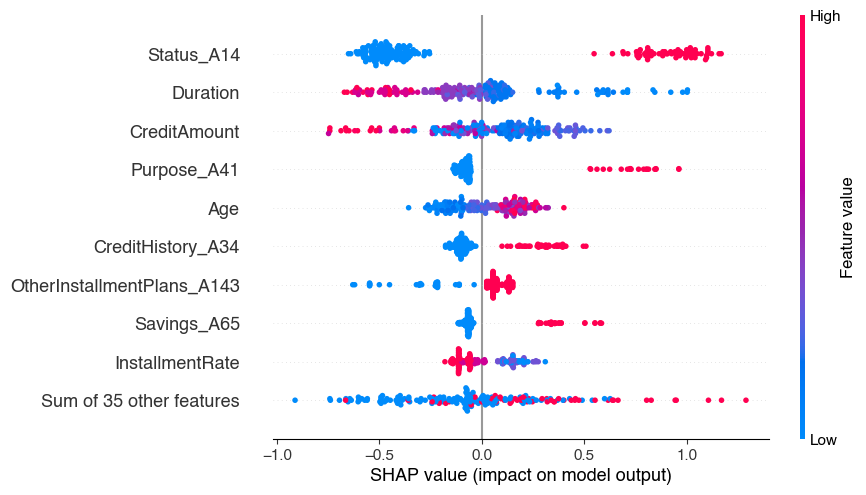

In [149]:
shap.plots.beeswarm(shap_values)

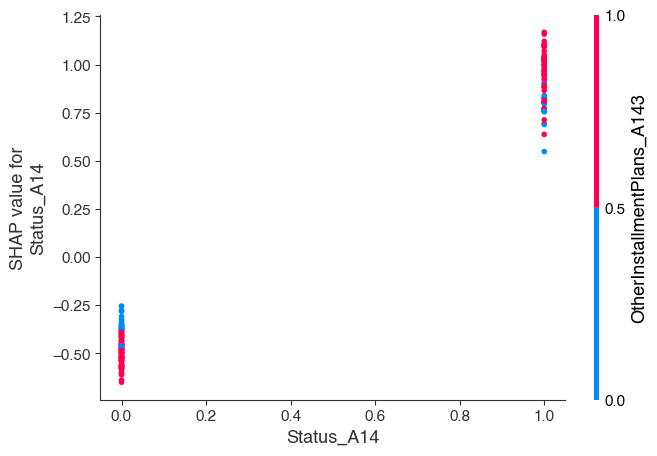

In [151]:
# Set Helvetica font and custom font sizes
plt.rcParams.update({
    'font.family': 'Helvetica',
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 11,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 10,
    'figure.figsize': (8, 5)  # Adjust for better layout
})

# Determine top feature by mean absolute SHAP value
top_feature = X_test.columns[np.argsort(np.abs(shap_values.values).mean(0))[-1]]

# Generate the dependence plot
shap.dependence_plot(
    top_feature,
    shap_values.values,
    X_test, # optionally set this to visualize 2-feature interactions
    show=True
)

In [153]:
# Force plot for a single instance
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[0], X_test.iloc[0, :])

In [155]:
# Force plot for a single instance
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[0])